# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [32]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [33]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [34]:
type(alpaca_api_key)

str

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [35]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start_date,
    end_date
).df


# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker[df_ticker['symbol']=='TSLA']
KO = df_ticker[df_ticker['symbol']=='KO']

# Concatenate the ticker DataFrames
df_ticker = pd.concat([KO,TSLA], axis=1, keys=['KO','TSLA'])

# Display sample data
df_ticker.head(10)

KO                                               \
                            open     high    low  close    volume trade_count   
timestamp                                                                       
2019-05-01 04:00:00+00:00  48.95  49.0750  48.55  48.59  10551594       55430   
2019-05-02 04:00:00+00:00  48.53  48.7657  48.27  48.39   8724932       49477   
2019-05-03 04:00:00+00:00  48.60  48.9600  48.52  48.72   7076949       39003   
2019-05-06 04:00:00+00:00  48.33  48.6100  48.26  48.47   8658209       44597   
2019-05-07 04:00:00+00:00  48.23  48.2900  47.77  48.00  12487481       59828   
2019-05-08 04:00:00+00:00  48.05  48.2300  47.82  47.85   9281542       54533   
2019-05-09 04:00:00+00:00  47.80  47.9800  47.07  47.40  11450532       67043   
2019-05-10 04:00:00+00:00  47.41  48.2950  47.40  48.19   9661832       57158   
2019-05-13 04:00:00+00:00  47.91  48.1300  47.73  48.05  11911511       61467   
2019-05-14 04:00:00+00:00  48.53  49.3200  48.35  48.69  16844303       79041   

                                               TSLA                      \
                                vwap symbol    open      high       low   
timestamp                                                                 
2019-05-01 04:00:00+00:00  48.792137     KO  238.85  240.0000  231.5000   
2019-05-02 04:00:00+00:00  48.453170     KO  245.52  247.1300  237.7200   
2019-05-03 04:00:00+00:00  48.773171     KO  243.86  256.6100  243.4900   
2019-05-06 04:00:00+00:00  48.465858     KO  250.02  258.3499  248.5000   
2019-05-07 04:00:00+00:00  48.012280     KO  256.80  257.2100  245.1000   
2019-05-08 04:00:00+00:00  47.948017     KO  246.94  250.5990  244.2000   
2019-05-09 04:00:00+00:00  47.424069     KO  242.00  243.6800  236.9434   
2019-05-10 04:00:00+00:00  47.898366     KO  239.75  241.9900  236.0200   
2019-05-13 04:00:00+00:00  47.962829     KO  232.01  232.4700  224.5000   
2019-05-14 04:00:00+00:00  48.837574     KO  229.30  234.5000  228.0000   

                                                                            
                            close    volume trade_count        vwap symbol  
timestamp                                                                   
2019-05-01 04:00:00+00:00  234.01  10704355      108382  234.544288   TSLA  
2019-05-02 04:00:00+00:00  244.10  18167261      173521  242.763484   TSLA  
2019-05-03 04:00:00+00:00  255.03  23740838      205076  252.330502   TSLA  
2019-05-06 04:00:00+00:00  255.34  10860343       93066  254.021222   TSLA  
2019-05-07 04:00:00+00:00  247.06  10261408      103693  249.863277   TSLA  
2019-05-08 04:00:00+00:00  244.84   6180840       65862  246.860249   TSLA  
2019-05-09 04:00:00+00:00  241.98   6722392       76082  240.437191   TSLA  
2019-05-10 04:00:00+00:00  239.52   7019816       77937  238.631949   TSLA  
2019-05-13 04:00:00+00:00  227.01  10834883      138343  227.590470   TSLA  
2019-05-14 04:00:00+00:00  232.31   7254012       83667  231.645769   TSLA

## Pick closing prices and compute the daily returns

In [36]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices['KO'] = df_ticker['KO']['close']
df_closing_prices['TSLA'] = df_ticker['TSLA']['close']

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change()

# Display sample data
df_daily_returns.head(10)

,KO,TSLA
2019-05-01,NaN,NaN
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986
2019-05-09,-0.009404,-0.011681
2019-05-10,0.016667,-0.010166
2019-05-13,-0.002905,-0.052229
2019-05-14,0.013319,0.023347


In [37]:
# Generate descriptive statistics
df_daily_returns.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000059,0.005515
std,0.019557,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

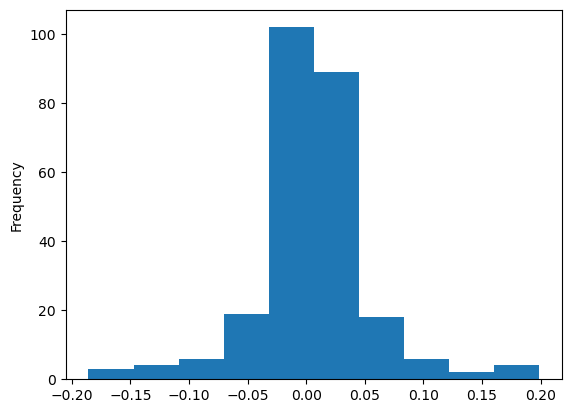

In [38]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns['TSLA'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

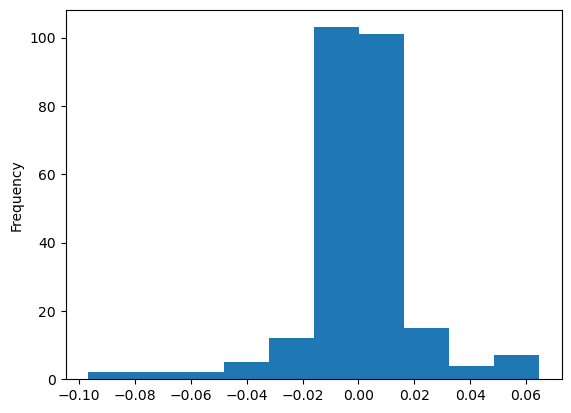

In [39]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns['KO'].plot.hist()

<AxesSubplot:ylabel='Density'>

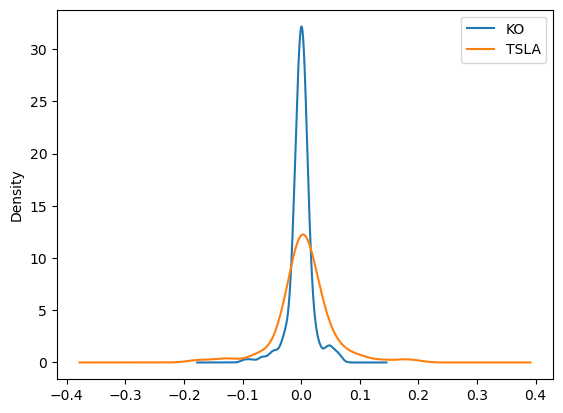

In [40]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()